In [15]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
from tensorflow.keras.datasets import mnist

In [6]:
data = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 5s 0us/step


In [8]:
(x_train,y_train),(x_test,y_test) = data

In [13]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


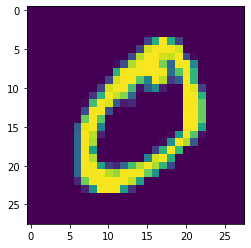

In [16]:
plt.imshow(x_train[1])

In [28]:
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist

model = Sequential()
model.add(Flatten(input_shape=(28,28)))
model.add(Dense(256, activation='sigmoid'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)


In [30]:
model.fit(x_train,y_train,epochs = 30)

Epoch 1/30
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4574 - sparse_categorical_accuracy: 0.8575
Epoch 2/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3159 - sparse_categorical_accuracy: 0.9002
Epoch 3/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2772 - sparse_categorical_accuracy: 0.9119
Epoch 4/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2443 - sparse_categorical_accuracy: 0.9223
Epoch 5/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2343 - sparse_categorical_accuracy: 0.9244
Epoch 6/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2151 - sparse_categorical_accuracy: 0.9303
Epoch 7/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2001 - sparse_categorical_accuracy: 0.9346
Epoch 8/30
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1860 - sparse_categorical_accuracy: 0.9408
Epoch 9/30
1875/1875 [==========

In [39]:
model2 = Sequential()
model2.add(Flatten(input_shape=(28,28)))
model2.add(Dense(10, activation='sigmoid'))

In [42]:
model2.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[tf.keras.metrics.SparseCategoricalAccuracy()],
)


In [43]:
model2.fit(x_train,y_train,epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 9.5464 - sparse_categorical_accuracy: 0.8400
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 6.1847 - sparse_categorical_accuracy: 0.8778
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.6735 - sparse_categorical_accuracy: 0.8825
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.3759 - sparse_categorical_accuracy: 0.8876
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.4341 - sparse_categorical_accuracy: 0.8867
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2154 - sparse_categorical_accuracy: 0.8875
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.2294 - sparse_categorical_accuracy: 0.8907
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 5.1720 - sparse_categorical_accuracy: 0.8893
Epoch 9/10
1875/1875 [==========

In [44]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline


In [56]:

y1 = []
for i in range (0,999):
    y1.append(random.uniform(5,6))
x1= []
for i in range (0,999):
    x1.append(random.uniform(12,13))
y = np.array(y1)
x = np.array(x1)
# Generating random linear data
# There will be 50 data points ranging from 0 to 50
x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)

# Adding noise to the random linear data
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

n = len(x) # Number of data points

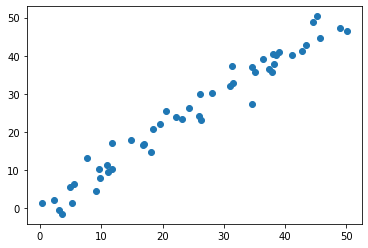

In [57]:
plt.scatter(x,y)
plt.show()

In [58]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = np.mean(x)
    y_mean = np.mean(y)
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    B0 = y_mean - (B1*x_mean)
    
    return (B0, B1)

In [59]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [60]:
B0, B1 = linear_regression(x, y)
print('line is : ',B0,'+',B1,'X')
R = corr_coef(x, y)
print('Correlation Coefficient: ', R)
print('"Goodness of Fit": ', R**2)

line is :  -0.17024243924160842 + 1.0193050505504122 X
Correlation Coefficient:  0.9810997336874071
"Goodness of Fit":  0.9625566874415011


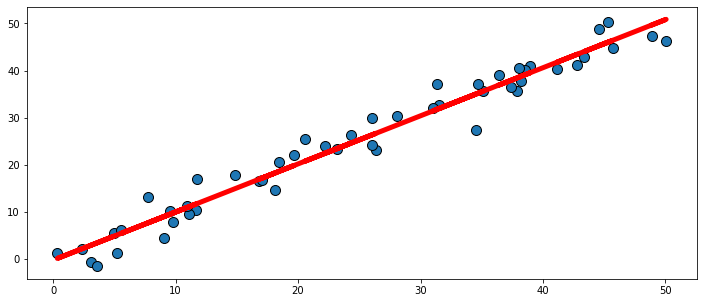

In [61]:
plt.figure(figsize=(12,5))
plt.scatter(x, y, s=100, linewidths=1, edgecolor='black')
plt.plot(x, B0 + B1*x, c = 'r', linewidth=5, )



In [62]:
# Generating random linear data
# There will be 50 data points ranging from 0 to 50
x = np.linspace(0, 50, 50)
y = np.linspace(0, 50, 50)

# Adding noise to the random linear data
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

n = len(x) # Number of data points


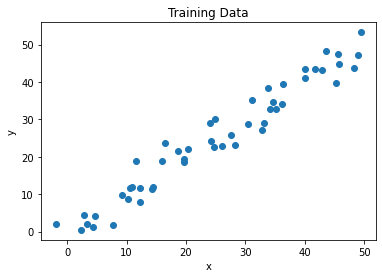

In [63]:
# Plot of Training Data
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training Data")
plt.show()


In [67]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [68]:
tf.random.set_seed(12)

In [76]:
model3 = Sequential()

In [89]:
model3.add(Dense(10))
model.add(Dense(2))

In [90]:
model3.compile(
    optimizer=tf.keras.optimizers.SGD(),
    loss=tf.keras.losses.mae,
    metrics=['mae'],
)


In [91]:
graph = model3.fit(x,y,epochs =300)

Epoch 1/300
2/2 [==============================] - 0s 3ms/step - loss: 25.6706 - mae: 25.6706
Epoch 2/300
2/2 [==============================] - 0s 3ms/step - loss: 15.7199 - mae: 15.7199
Epoch 3/300
2/2 [==============================] - 0s 3ms/step - loss: 15.6938 - mae: 15.6938
Epoch 4/300
2/2 [==============================] - 0s 3ms/step - loss: 17.6015 - mae: 17.6015
Epoch 5/300
2/2 [==============================] - 0s 5ms/step - loss: 14.7327 - mae: 14.7327
Epoch 6/300
2/2 [==============================] - 0s 3ms/step - loss: 16.5088 - mae: 16.5088
Epoch 7/300
2/2 [==============================] - 0s 3ms/step - loss: 16.7025 - mae: 16.7025
Epoch 8/300
2/2 [==============================] - 0s 3ms/step - loss: 15.5627 - mae: 15.5627
Epoch 9/300
2/2 [==============================] - 0s 4ms/step - loss: 12.7747 - mae: 12.7747
Epoch 10/300
2/2 [==============================] - 0s 3ms/step - loss: 12.9887 - mae: 12.9887
Epoch 11/300
2/2 [==============================] - 0s 3ms/

2/2 [==============================] - 0s 2ms/step - loss: 5.6464 - mae: 5.6464
Epoch 89/300
2/2 [==============================] - 0s 3ms/step - loss: 6.4452 - mae: 6.4452
Epoch 90/300
2/2 [==============================] - 0s 3ms/step - loss: 6.0863 - mae: 6.0863
Epoch 91/300
2/2 [==============================] - 0s 3ms/step - loss: 7.0890 - mae: 7.0890
Epoch 92/300
2/2 [==============================] - 0s 3ms/step - loss: 5.9430 - mae: 5.9430
Epoch 93/300
2/2 [==============================] - 0s 3ms/step - loss: 5.2915 - mae: 5.2915
Epoch 94/300
2/2 [==============================] - 0s 2ms/step - loss: 7.1321 - mae: 7.1321
Epoch 95/300
2/2 [==============================] - 0s 3ms/step - loss: 4.4194 - mae: 4.4194
Epoch 96/300
2/2 [==============================] - 0s 3ms/step - loss: 6.5708 - mae: 6.5708
Epoch 97/300
2/2 [==============================] - 0s 2ms/step - loss: 7.1046 - mae: 7.1046
Epoch 98/300
2/2 [==============================] - 0s 3ms/step - loss: 5.6704 - ma

2/2 [==============================] - 0s 2ms/step - loss: 2.8978 - mae: 2.8978
Epoch 176/300
2/2 [==============================] - 0s 3ms/step - loss: 2.7835 - mae: 2.7835
Epoch 177/300
2/2 [==============================] - 0s 2ms/step - loss: 2.8277 - mae: 2.8277
Epoch 178/300
2/2 [==============================] - 0s 2ms/step - loss: 3.1315 - mae: 3.1315
Epoch 179/300
2/2 [==============================] - 0s 3ms/step - loss: 4.4730 - mae: 4.4730
Epoch 180/300
2/2 [==============================] - 0s 2ms/step - loss: 4.2378 - mae: 4.2378
Epoch 181/300
2/2 [==============================] - 0s 2ms/step - loss: 3.6004 - mae: 3.6004
Epoch 182/300
2/2 [==============================] - 0s 3ms/step - loss: 2.9774 - mae: 2.9774
Epoch 183/300
2/2 [==============================] - 0s 2ms/step - loss: 2.9824 - mae: 2.9824
Epoch 184/300
2/2 [==============================] - 0s 2ms/step - loss: 2.8907 - mae: 2.8907
Epoch 185/300
2/2 [==============================] - 0s 3ms/step - loss: 3

2/2 [==============================] - 0s 3ms/step - loss: 3.9825 - mae: 3.9825
Epoch 263/300
2/2 [==============================] - 0s 2ms/step - loss: 3.6342 - mae: 3.6342
Epoch 264/300
2/2 [==============================] - 0s 4ms/step - loss: 3.0179 - mae: 3.0179
Epoch 265/300
2/2 [==============================] - 0s 3ms/step - loss: 3.0766 - mae: 3.0766
Epoch 266/300
2/2 [==============================] - 0s 2ms/step - loss: 2.8024 - mae: 2.8024
Epoch 267/300
2/2 [==============================] - 0s 5ms/step - loss: 2.8180 - mae: 2.8180
Epoch 268/300
2/2 [==============================] - 0s 3ms/step - loss: 3.5408 - mae: 3.5408
Epoch 269/300
2/2 [==============================] - 0s 3ms/step - loss: 2.7643 - mae: 2.7643
Epoch 270/300
2/2 [==============================] - 0s 2ms/step - loss: 2.9037 - mae: 2.9037
Epoch 271/300
2/2 [==============================] - 0s 2ms/step - loss: 3.4452 - mae: 3.4452
Epoch 272/300
2/2 [==============================] - 0s 3ms/step - loss: 3

In [92]:
test_loss, test_acc = model3.evaluate(x, y, verbose=2)
print('\nTest Loss:', test_loss)

2/2 - 0s - loss: 3.3886 - mae: 3.3886 - 66ms/epoch - 33ms/step

Test Loss: 3.388643264770508


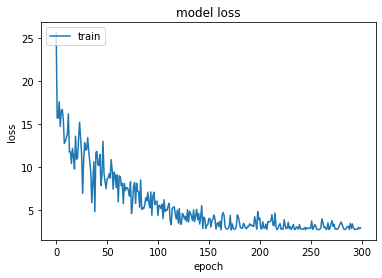

In [93]:
plt.plot(graph.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()